<a href="https://colab.research.google.com/github/Peppecoding/lewagon/blob/main/3_Your_first_Classification_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

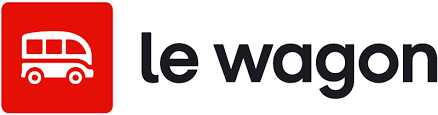

# The Titanic dataset

For your first **classification** task of the week, you'll work on a classic ML dataset - Titanic passengers!

The model we'll be using is **Logistic Regression**. \

We won't dwell too much today on why this model is best suited, but just remember that we're trying to classify something (whether a passenger survived or not), which is what **Logistic Regression** does.

## Import the data

Import the Titanic dataset using this link: https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Titanic_dataset.csv


Load it into a `df`variable.


<details>
    <summary>Tips 💯</summary>
    
Same as in the previous challenge, you can download the file and upload it to Google Colab, or you can directly but the download link inside the `pd.read_csv()` function!
    
    
</details>


In [ ]:
#your code here
# 1. Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# 2. Load the data
df = pd.read_csv("/content/ML_Titanic_dataset.csv")
df.head()

# 3. Inspect data (optional)
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Inspect the data

Have a look at the imported dataset! Try to scope out potential features and targets.

In [ ]:
#your code here

# Show first 5 rows of the dataset
df.head()

# Check the shape: rows and columns
df.shape

# Check data types and missing values
df.info()

# Quick statistics of numeric columns
df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Pick X and y

Ok, now that you've visualized the DataFrame, let's create **X** and **y**.


Try to model whether a passenger **Survived** or **not** based on the following features:

- `Pclass`: The class they were in
- `SibSp`: The number of siblings or spouses on the Titanic
- `Parch`: The number of parents or children on the Titanic
- `Fare`: How much they paid for their ticket

In [ ]:
#your code here
# X = the features we will use to predict
X = df[["Pclass", "SibSp", "Parch", "Fare"]]

# y = the target column (what we want to predict)
y = df["Survived"]


## Train Test Split

Remember when we said that splitting the data is **one of the most important things in Machine Learning?**

Use Sklearn's `train_test_split` function to split your data into `X_train`, `X_test`, `y_train` and `y_test`.


- Use `random_state=0` to compare your final results with your buddy's results.


In [ ]:
#your code here
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

X_train.head()


,Pclass,SibSp,Parch,Fare
140,3,0,2,15.2458
439,2,0,0,10.5000
817,2,1,1,37.0042
378,3,0,0,4.0125
491,3,0,0,7.2500


## Normalization

Now we need to normalize our features.

Use Sklearn's `Standard Scaler` to bring all of the features to the same scale.

Save your scaled features to two new variables named `X_train_scaled`and `X_test_scaled`.


In [ ]:
#your code here

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Modelling

Now we can actually run our ML model!

Import, instantiate and fit a **Logistic Regression** model on the training data.


In [ ]:
#your code here

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

## Model Evaluation

Score your fitted model on your **test dataset**.

In [ ]:
#your code here

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, y_train)



LogisticRegression()

How can we interpret this 71% score ?

<details>
<summary>Answer 💡</summary>

The default scoring metric for a **Logistic Regression** model is called the `accuracy`. \
It basically means that when running predictions on our test set, 71% of the returned values would be correctly predicted. You will get more information on the scoring metrics on future lectures.

</details>

## Prediction


We've found records of a passenger that weren't in the original dataset!

Use the model we've just created to predict whether they would have survived or not!


<details>
    <summary>Hint 🔍</summary>
    
Don't forget to normalize the data, but don't fit your scaler on this new data, just transform it (otherwise, you're causing **data leakage**).
    
     
</details>

In [ ]:
new_record = pd.DataFrame({"Pclass" : [1], "SibSp" : [0], "Parch" : [1], "Fare" : [65]})
new_record

,Pclass,SibSp,Parch,Fare
0,1,0,1,65


In [ ]:
#your code here

# Scale the new record with the same scaler
new_record_scaled = scaler.transform(new_record)

# Predict survival
prediction = model.predict(new_record_scaled)

# Print the result
print("Prediction (1 = survived, 0 = not):", prediction[0])



Prediction (1 = survived, 0 = not): 1


How do you interpret the result?


> **Your answer here (Double Click)**
The model predicts this passenger would have survived (or not) based on their ticket class, family info, and fare.

**Congratulations on training your first classification model!** 🎉
